### Using Synthetic Data to build Fraud detection models
1. Making sure the data is clean free from null and transformations of data types)
1. Asessing the dat set and identifying the features that are more significant
2. Visualizing the values with respect to the Fraudulent transactions

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

In [35]:
df=pd.read_csv("/content/Synthetic_Fraud_Detection.csv")
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Data set consists od 0.1% Fraudulent transactions

In [36]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [5]:
import seaborn as sns

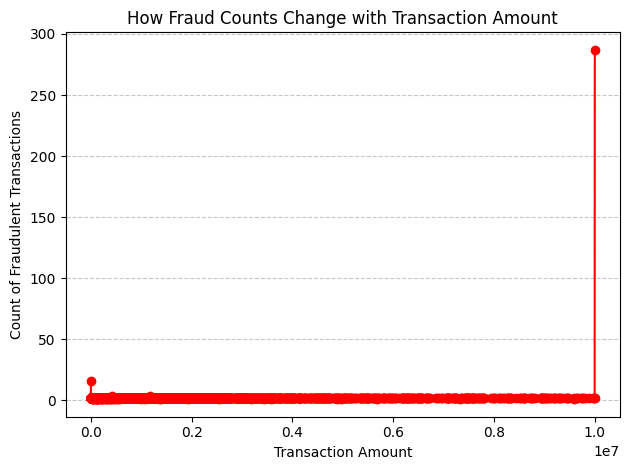

In [6]:
import matplotlib.pyplot as plt

# Filter for fraudulent transactions
fraud_data = df[df['isFraud'] == 1]

# Group by transaction amount and count occurrences
fraud_counts = fraud_data.groupby('amount')['isFraud'].count()

# Plot the line chart
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', color='red', linestyle='-')
plt.xlabel('Transaction Amount')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('How Fraud Counts Change with Transaction Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Fraudulebnt counts Varrying with the transaction amount.
Can be seen that transaction amount is highest between $1 and $25,000

<ipython-input-38-a70d4b701f10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_binned = fraud_data.groupby(bins)['isFraud'].count()


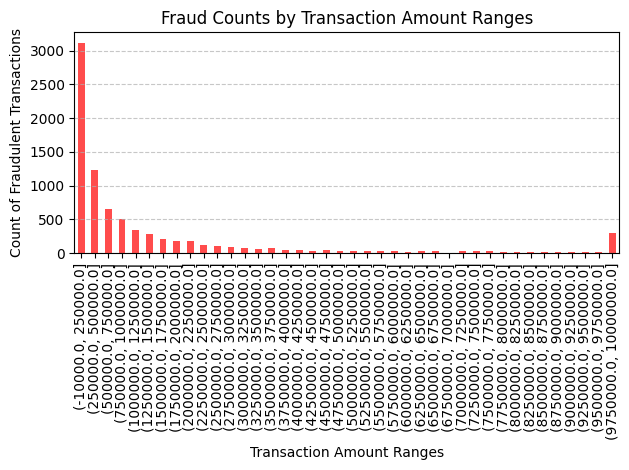

In [38]:
bins = pd.cut(fraud_data['amount'], bins=40)  # Group amounts into 10 bins
fraud_counts_binned = fraud_data.groupby(bins)['isFraud'].count()

fraud_counts_binned.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Transaction Amount Ranges')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraud Counts by Transaction Amount Ranges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cash out and Transfers have all the fraudulent transactions and are eually distributed.

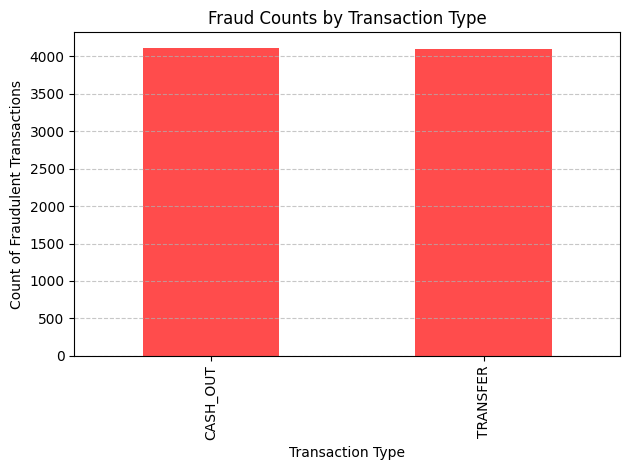

In [39]:
import matplotlib.pyplot as plt

# Group by transaction type and count fraudulent transactions
fraud_counts_type = fraud_data.groupby('type')['isFraud'].count()

# Plot the bar chart
fraud_counts_type.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Transaction Type')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraud Counts by Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Most fraudulent transactions result in the final balance being 0

<ipython-input-9-f8def8a07c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['balance_difference'] = fraud_data['newbalanceOrig'] - fraud_data['oldbalanceOrg']
<ipython-input-9-f8def8a07c87>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_binned = fraud_data.groupby(bins)['isFraud'].count()


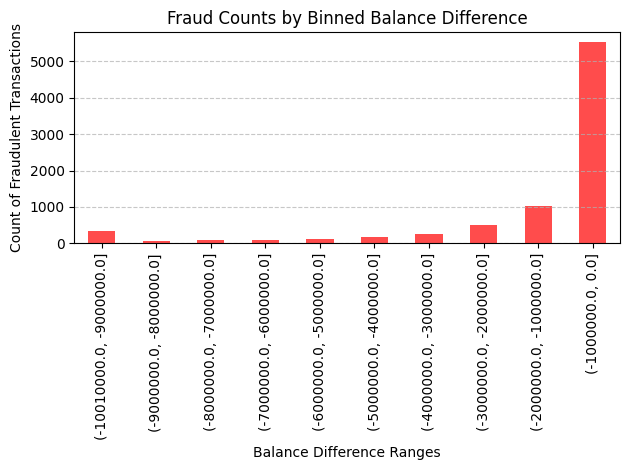

In [9]:
fraud_data['balance_difference'] = fraud_data['newbalanceOrig'] - fraud_data['oldbalanceOrg']
# Bin the balance differences into intervals
bins = pd.cut(fraud_data['balance_difference'], bins=10)

# Group by these bins and count fraudulent transactions
fraud_counts_binned = fraud_data.groupby(bins)['isFraud'].count()

# Plot the fraud counts by binned balance difference
fraud_counts_binned.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Balance Difference Ranges')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraud Counts by Binned Balance Difference')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-10-8a198a6caed0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['balance_difference'] =  fraud_data['oldbalanceOrg']-fraud_data['newbalanceOrig']


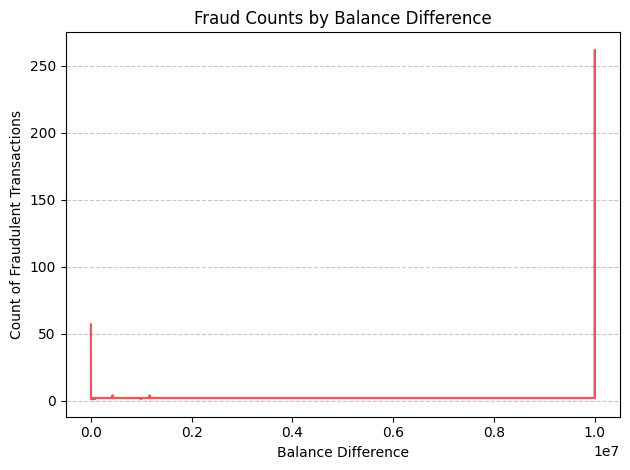

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the balance difference
fraud_data['balance_difference'] =  fraud_data['oldbalanceOrg']-fraud_data['newbalanceOrig']

# Group by 'balance_difference' and count fraudulent transactions
fraud_counts_by_balance = fraud_data.groupby('balance_difference')['isFraud'].count()

# Plot the fraud counts by balance difference
fraud_counts_by_balance.plot(kind='line', color='red', alpha=0.7)
plt.xlabel('Balance Difference')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraud Counts by Balance Difference')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import f_oneway
import pandas as pd

# Perform ANOVA for each numeric column
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','step']
anova_results = {}

for col in numeric_cols:
    fraud_group = df[df['isFraud'] == 1][col]
    non_fraud_group = df[df['isFraud'] == 0][col]

    # Perform ANOVA
    f_stat, p_value = f_oneway(fraud_group, non_fraud_group)
    anova_results[col] = {'F-Statistic': f_stat, 'P-Value': p_value}

# Convert results into a DataFrame for better readability
anova_df = pd.DataFrame(anova_results).T

# Display ANOVA results
print(anova_df)

                 F-Statistic        P-Value
amount          37640.657952   0.000000e+00
oldbalanceOrg     656.131724  1.054289e-144
newbalanceOrig    422.458368   7.168312e-94
oldbalanceDest    220.386451   7.463207e-50
newbalanceDest      1.823504   1.768967e-01
step             6350.771614   0.000000e+00


## It is seen that all the Numerical columns have significant impacton the Fraud detection as the P vaue
is very close to zero for all the columns.

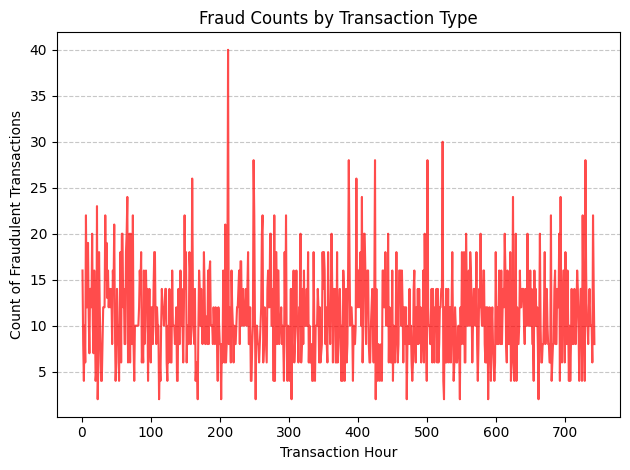

In [26]:
import matplotlib.pyplot as plt

# Group by transaction type and count fraudulent transactions
fraud_counts_type = fraud_data.groupby('step')['isFraud'].count()

# Plot the bar chart
fraud_counts_type.plot(kind='line', color='red', alpha=0.7)
plt.xlabel('Transaction Hour')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Fraud Counts by Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


### Type categorical columnis significant in identifying fraud

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for 'type' and 'isFraud'
contingency_table = pd.crosstab(df['type'], df['isFraud'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Chi-Square Test Results:
Chi-Square Statistic: 22082.53571319108
P-Value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[1.39747778e+06 1.80622440e+03]
 [2.23461179e+06 2.88821075e+03]
 [4.13785187e+04 5.34812728e+01]
 [2.14871781e+06 2.77719374e+03]
 [5.32221110e+05 6.87889834e+02]]


### Converting Categorical to Numerical

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'type' column
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Display the mapping
type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Type Mapping:", type_mapping)

# Preview the data
print(df[['type', 'type_encoded']].head())

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Apply scaling to the df DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Preview the scaled data from df
print(df[numeric_cols].head())


Type Mapping: {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}
       type  type_encoded
0   PAYMENT             3
1   PAYMENT             3
2  TRANSFER             4
3  CASH_OUT             1
4   PAYMENT             3


### Scaling Numerical Values
Z-score scaling(Standard scaler)

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Apply scaling to the df DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Preview the scaled data from df
print(df[numeric_cols].head())

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0 -0.281560      -0.229810       -0.237622       -0.323814       -0.333411
1 -0.294767      -0.281359       -0.285812       -0.323814       -0.333411
2 -0.297555      -0.288654       -0.292442       -0.323814       -0.333411
3 -0.297555      -0.288654       -0.292442       -0.317582       -0.333411
4 -0.278532      -0.274329       -0.282221       -0.323814       -0.333411


In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,3
1,1,PAYMENT,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,3
2,1,TRANSFER,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,4
3,1,CASH_OUT,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,1
4,1,PAYMENT,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,3


Saving the data set (Cleaned, scaled, transformed)

In [44]:
df.to_csv('Synthetic_encoded_Scaled.csv')